<a href="https://colab.research.google.com/github/aryanpillai/aryanpillai/blob/main/LITHIUM_ION_BATTERY_LIFETIME_PREDICTION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Necessary Libraries.
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing


In [ ]:
#Loading Dataset
dataset = pd.read_csv('Main Dataset.csv')
dataset.head()

,Battery No,Cycle No,Time (Hrs:Mins),Time (Mins),Voltage(V),Current(A),Remaining Time,Status
0,B001,1.0,00:00:00,0.0,3.92,0.1909,72.0,DIS
1,B002,1.0,00:00:00,0.0,3.83,0.1935,63.0,DIS
2,B003,1.0,00:00:00,0.0,3.95,0.191,87.0,DIS
3,B005,1.0,00:00:00,0.0,3.84,0.1895,69.0,DIS
4,B001,1.0,00:03:00,3.0,3.88,0.1903,69.0,DIS


In [ ]:
dataset.describe()

,Cycle No,Time (Mins),Voltage(V),Remaining Time
count,844.000000,844.000000,661.000000,661.000000
mean,3.090047,65.943128,3.494054,52.443268
std,1.379891,42.507822,0.769574,35.983900
min,1.000000,0.000000,0.700000,0.000000
25%,2.000000,30.000000,3.560000,24.000000
50%,3.000000,63.000000,3.780000,48.000000
75%,4.000000,99.000000,3.880000,75.000000
max,5.000000,150.000000,4.230000,150.000000


In [ ]:
# Dropping Unnecessary Columns from the Dataset.
dataset = dataset.drop(labels=['Status'],axis=1)
dataset = dataset.drop(labels = ['Battery No'],axis=1)
dataset = dataset.drop(labels = ['Time (Hrs:Mins)'],axis=1)
dataset = dataset.drop(labels = ['Current(A)'],axis=1)
print(dataset.head())

   Cycle No  Time (Mins)  Voltage(V)  Remaining Time
0       1.0          0.0        3.92            72.0
1       1.0          0.0        3.83            63.0
2       1.0          0.0        3.95            87.0
3       1.0          0.0        3.84            69.0
4       1.0          3.0        3.88            69.0


In [ ]:
# Executing Data preprocessing steps.
print('SHAPE OF DATAFRAME : {}'.format(dataset.shape))
print(dataset.loc[1])


SHAPE OF DATAFRAME : (848, 4)
Cycle No           1.00
Time (Mins)        0.00
Voltage(V)         3.83
Remaining Time    63.00
Name: 1, dtype: float64


In [ ]:
dataset.loc[1:]

,Cycle No,Time (Mins),Voltage(V),Remaining Time
1,1.0,0.0,3.83,63.0
2,1.0,0.0,3.95,87.0
3,1.0,0.0,3.84,69.0
4,1.0,3.0,3.88,69.0
5,1.0,3.0,3.81,60.0
...,...,...,...,...
843,5.0,147.0,3.53,3.0
844,5.0,150.0,NaN,NaN
845,5.0,150.0,NaN,NaN
846,5.0,150.0,NaN,NaN


In [ ]:
data = dataset[~dataset.isin(['?'])]
data.loc[1:]

,Cycle No,Time (Mins),Voltage(V),Remaining Time
1,1.0,0.0,3.83,63.0
2,1.0,0.0,3.95,87.0
3,1.0,0.0,3.84,69.0
4,1.0,3.0,3.88,69.0
5,1.0,3.0,3.81,60.0
...,...,...,...,...
843,5.0,147.0,3.53,3.0
844,5.0,150.0,NaN,NaN
845,5.0,150.0,NaN,NaN
846,5.0,150.0,NaN,NaN


In [ ]:
data = data.dropna(axis=0)
data.loc[1:]

,Cycle No,Time (Mins),Voltage(V),Remaining Time
1,1.0,0.0,3.83,63.0
2,1.0,0.0,3.95,87.0
3,1.0,0.0,3.84,69.0
4,1.0,3.0,3.88,69.0
5,1.0,3.0,3.81,60.0
...,...,...,...,...
831,5.0,138.0,3.68,12.0
835,5.0,141.0,3.65,9.0
839,5.0,144.0,3.60,6.0
843,5.0,147.0,3.53,3.0


In [ ]:
print(data.shape)
print(data.keys())
print(data.dtypes)

(661, 4)
Index(['Cycle No', 'Time (Mins)', 'Voltage(V)', 'Remaining Time'], dtype='object')
Cycle No          float64
Time (Mins)       float64
Voltage(V)        float64
Remaining Time    float64
dtype: object


In [ ]:
data =data.apply(pd.to_numeric)
data.dtypes

Cycle No          float64
Time (Mins)       float64
Voltage(V)        float64
Remaining Time    float64
dtype: object

In [ ]:
data.describe()

,Cycle No,Time (Mins),Voltage(V),Remaining Time
count,661.000000,661.000000,661.000000,661.000000
mean,3.065053,52.443268,3.494054,52.443268
std,1.375215,35.983900,0.769574,35.983900
min,1.000000,0.000000,0.700000,0.000000
25%,2.000000,24.000000,3.560000,24.000000
50%,3.000000,48.000000,3.780000,48.000000
75%,4.000000,75.000000,3.880000,75.000000
max,5.000000,150.000000,4.230000,150.000000


<function matplotlib.pyplot.show(close=None, block=None)>

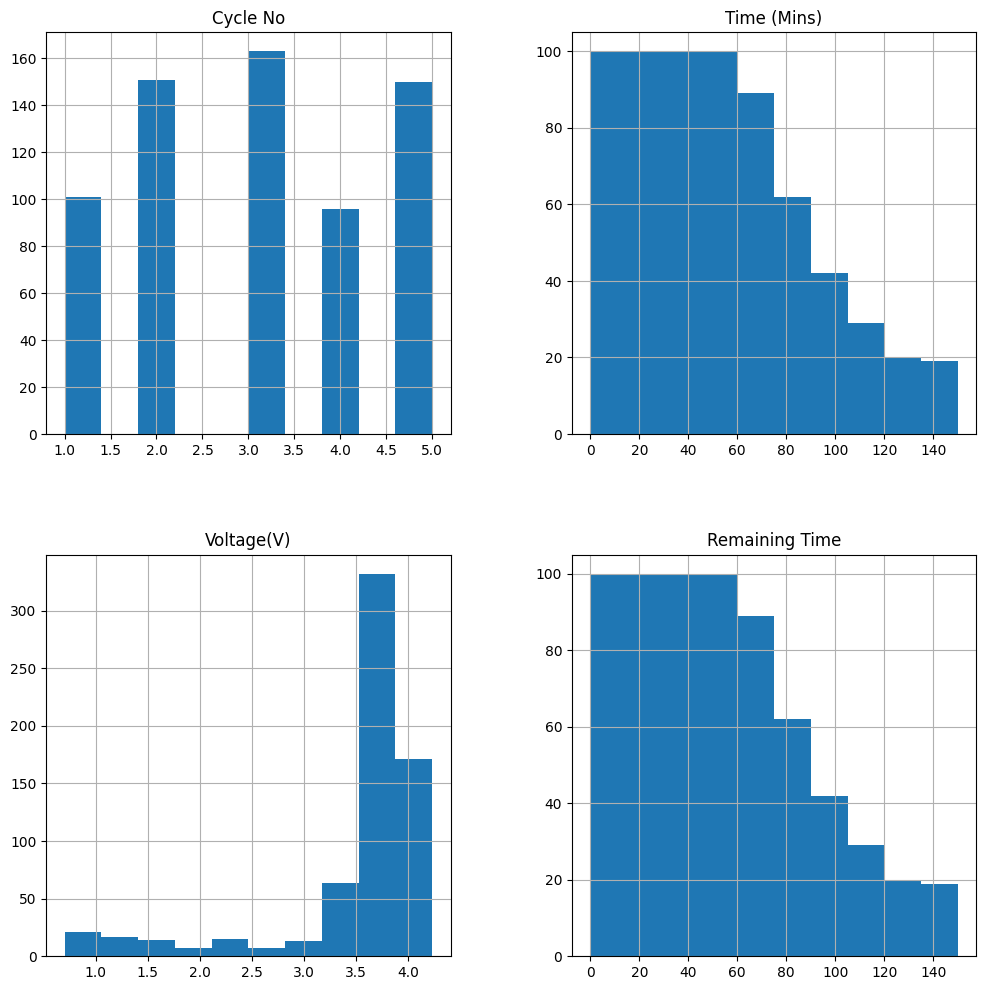

In [ ]:
data.hist(figsize=(12,12))
plt.show


In [ ]:
dataset.head()

,Cycle No,Time (Mins),Voltage(V),Remaining Time
0,1.0,0.0,3.92,72.0
1,1.0,0.0,3.83,63.0
2,1.0,0.0,3.95,87.0
3,1.0,0.0,3.84,69.0
4,1.0,3.0,3.88,69.0


<Axes: title={'center': 'Features Standard Deviation'}>

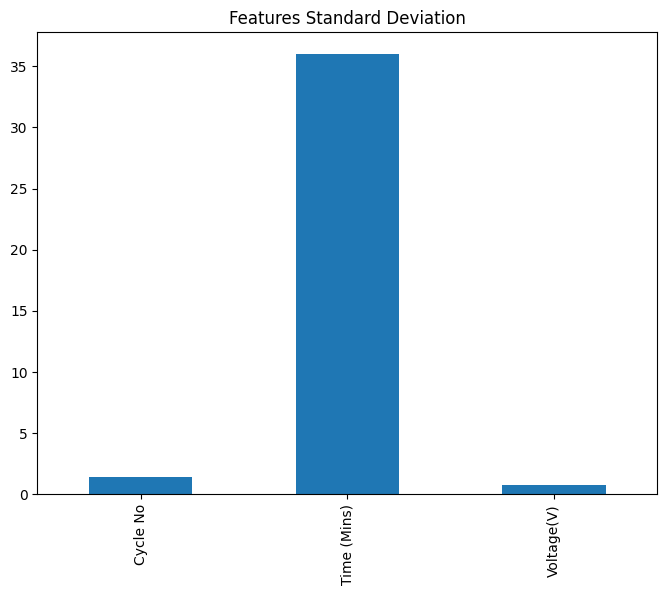

In [ ]:
features = ["Cycle No","Time (Mins)","Voltage(V)"]
data[features].std().plot(kind='bar',figsize=(8,6),title="Features Standard Deviation")

In [ ]:
# Creating Arrays for X as the Features and Y as the Target value.
X = np.array(data.iloc[:,0:3].values)
y = np.array(data.iloc[:,3].values)

In [ ]:
X

array([[  1.  ,   0.  ,   3.92],
       [  1.  ,   0.  ,   3.83],
       [  1.  ,   0.  ,   3.95],
       ...,
       [  5.  , 144.  ,   3.6 ],
       [  5.  , 147.  ,   3.53],
       [  5.  , 150.  ,   3.42]])

In [ ]:
y


array([ 72.,  63.,  87.,  69.,  69.,  60.,  84.,  66.,  66.,  57.,  81.,
        63.,  63.,  54.,  78.,  60.,  60.,  51.,  75.,  57.,  57.,  48.,
        72.,  54.,  54.,  45.,  69.,  51.,  51.,  42.,  66.,  48.,  48.,
        39.,  63.,  45.,  45.,  36.,  60.,  42.,  42.,  33.,  57.,  39.,
        39.,  30.,  54.,  36.,  36.,  27.,  51.,  33.,  33.,  24.,  48.,
        30.,  30.,  21.,  45.,  27.,  27.,  18.,  42.,  24.,  24.,  15.,
        39.,  21.,  21.,  12.,  36.,  18.,  18.,   9.,  33.,  15.,  15.,
         6.,  30.,  12.,  12.,   3.,  27.,   9.,   9.,   0.,  24.,   6.,
         6.,  21.,   3.,   3.,  18.,   0.,   0.,  15.,  12.,   9.,   6.,
         3.,   0., 150., 111., 102.,  78., 147., 108.,  99.,  75., 144.,
       105.,  96.,  72., 141., 102.,  93.,  69., 138.,  99.,  90.,  66.,
       135.,  96.,  87.,  63., 132.,  93.,  84.,  60., 129.,  90.,  81.,
        57., 126.,  87.,  78.,  54., 123.,  84.,  75.,  51., 120.,  81.,
        72.,  48., 117.,  78.,  69.,  45., 114.,  7

In [ ]:
# Standardization of the data using z-score formula.
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X/=std
print(mean)
print(std)

[ 3.06505295 52.44326778  3.49405446]
[ 1.37417434 35.9566709   0.76899185]


In [ ]:
# Splitting the Dataset into Train & Test Splits.
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,random_state=42,test_size=0.3)

In [ ]:
print(X_test.shape)
print(y_test.shape)

(199, 3)
(199,)


In [ ]:
#Importing Keras and other necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense , Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Defining the model architecture.
def getModel():
  model = Sequential()
  model.add(Dense(units = 64 , activation ='relu',input_shape=(3,)))
  model.add(Dense(units=128,activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(units=256,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units=128,activation='relu'))
  model.add(Dense(units=64,activation='relu'))
  model.add(Dense(units=1,activation='linear'))

  return model

In [ ]:
model = getModel()
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 64)                256       
                                                                 
 dense_97 (Dense)            (None, 128)               8320      
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_98 (Dense)            (None, 256)               33024     
                                                                 
 dropout_29 (Dropout)        (None, 256)               0         
                                                                 
 dense_99 (Dense)            (None, 128)               32896     
                                                                 
 dense_100 (Dense)           (None, 64)              

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
         ModelCheckpoint(filepath='best_model1.h5', monitor='val_loss', save_best_only=True)]

In [ ]:
#Compiling the model and setting the metrics.
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
#Training the model.
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=1,verbose=2,callbacks=callbacks)

Epoch 1/100
462/462 - 3s - loss: 1015.8723 - val_loss: 330.2476 - 3s/epoch - 6ms/step
Epoch 2/100
462/462 - 1s - loss: 386.9869 - val_loss: 268.3301 - 1s/epoch - 3ms/step
Epoch 3/100
462/462 - 1s - loss: 353.1416 - val_loss: 248.2273 - 1s/epoch - 3ms/step
Epoch 4/100
462/462 - 2s - loss: 333.7710 - val_loss: 247.7214 - 2s/epoch - 5ms/step
Epoch 5/100
462/462 - 2s - loss: 285.0732 - val_loss: 278.0237 - 2s/epoch - 3ms/step
Epoch 6/100
462/462 - 1s - loss: 248.1556 - val_loss: 220.8974 - 1s/epoch - 3ms/step
Epoch 7/100
462/462 - 1s - loss: 246.6234 - val_loss: 130.6445 - 1s/epoch - 3ms/step
Epoch 8/100
462/462 - 1s - loss: 177.0086 - val_loss: 186.6688 - 1s/epoch - 3ms/step
Epoch 9/100
462/462 - 1s - loss: 185.4288 - val_loss: 117.5673 - 1s/epoch - 3ms/step
Epoch 10/100
462/462 - 1s - loss: 190.6814 - val_loss: 165.7698 - 1s/epoch - 3ms/step
Epoch 11/100
462/462 - 1s - loss: 176.7010 - val_loss: 209.1358 - 1s/epoch - 3ms/step
Epoch 12/100
462/462 - 2s - loss: 136.4496 - val_loss: 107.283

Exception ignored in: <function _xla_gc_callback at 0x7ff189407640>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


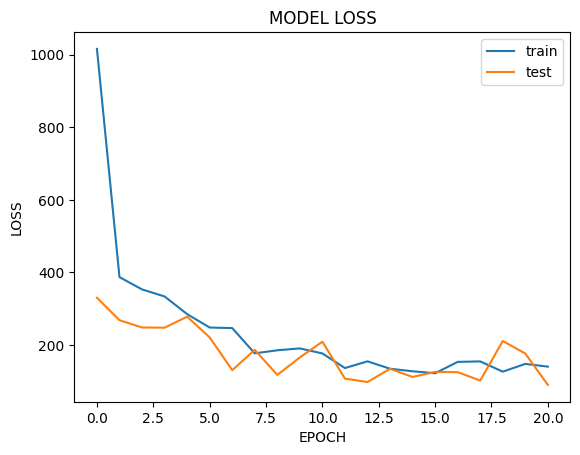

In [ ]:
#Plotting the Graph of Model Loss (MSE)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("MODEL LOSS")
plt.ylabel("LOSS")
plt.xlabel("EPOCH")
plt.legend(['train','test'])
plt.show()

In [ ]:
model2 = getModel()

In [ ]:
model2.load_weights("best_model.h5")

In [ ]:
#Testing the model outputs.
y_pred = model2.predict(X)


print("Predicted value of y:", y_pred[:5])

21/21 [==============================] - 0s 9ms/step
Predicted value of y: [[72.176926]
 [67.35959 ]
 [75.59968 ]
 [67.576035]
 [65.26113 ]]


In [ ]:
# calculate the percentage error between the elements of two arrays, y and y_pred.
array = []
for i in range(len(y_pred)):
  array.append((((y[i] - y_pred[i])/y[i]) * 100)[0])

<ipython-input-232-461e66e06fc4>:3: RuntimeWarning: divide by zero encountered in true_divide
  array.append((((y[i] - y_pred[i])/y[i]) * 100)[0])


In [ ]:
#Creating a dataframe to show the Actual Vs Predicted Values of Remaining time.
data = {"actual_remainingTime" : y, "predicted_remainingTime" : y_pred[:,0], "Percentage_Accuracy" : array}
output = pd.DataFrame(data)
output

,actual_remainingTime,predicted_remainingTime,Percentage_Accuracy
0,72.0,72.176926,-0.245730
1,63.0,67.359589,-6.919982
2,87.0,75.599678,13.103819
3,69.0,67.576035,2.063718
4,69.0,65.261131,5.418651
...,...,...,...
656,12.0,12.624907,-5.207562
657,9.0,10.797818,-19.975758
658,6.0,8.964734,-49.412235
659,3.0,7.610124,-153.670807
